In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
match_df = pd.read_csv('dim_match_summary.csv')
match_df.head(3)

,team1,team2,winner,margin,matchDate,match_id
0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817
1,Capitals,KKR,KKR,3 wickets,"Oct 13, 2021",T206442
2,RCB,KKR,KKR,4 wickets,"Oct 11, 2021",T208597


In [3]:
batting_df = pd.read_csv('fact_bating_summary.csv')
batting_df.head(3)

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66


In [4]:
bowling_df = pd.read_csv('fact_bowling_summary.csv')
bowling_df.head(3)

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0


In [5]:
players_df = pd.read_csv('dim_players.csv')
players_df.head(3)

,name,team,battingStyle,bowlingStyle,playingRole
0,RuturajGaikwad,Super Kings,Right hand Bat,Right arm Offbreak,Batter
1,FafduPlessis,Super Kings,Right hand Bat,Legbreak,Middle order Batter
2,RobinUthappa,Super Kings,Right hand Bat,Right arm Medium,Batter


In [116]:
match_df.head(2)

,team1,team2,winner,margin,matchDate,match_id,year
0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817,2021
1,Capitals,KKR,KKR,3 wickets,"Oct 13, 2021",T206442,2021


In [115]:
match_df.head(2)

,team1,team2,winner,margin,matchDate,match_id,year
0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817,2021
1,Capitals,KKR,KKR,3 wickets,"Oct 13, 2021",T206442,2021


In [11]:
batting_df.head(3)

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66


##  1. Top 10 batsmen based on past 3 years total runs scored

In [12]:
data1 = batting_df.groupby('batsmanName')['runs'].sum().sort_values(ascending = False).head(10).reset_index()
data1

,batsmanName,runs
0,ShubmanGill,1851
1,FafduPlessis,1831
2,RuturajGaikwad,1593
3,KLRahul,1516
4,JosButtler,1509
5,ShikharDhawan,1392
6,ViratKohli,1385
7,SanjuSamson,1304
8,SuryakumarYadav,1225
9,GlennMaxwell,1214


In [13]:
# Here's The Visualization of the Above Data.

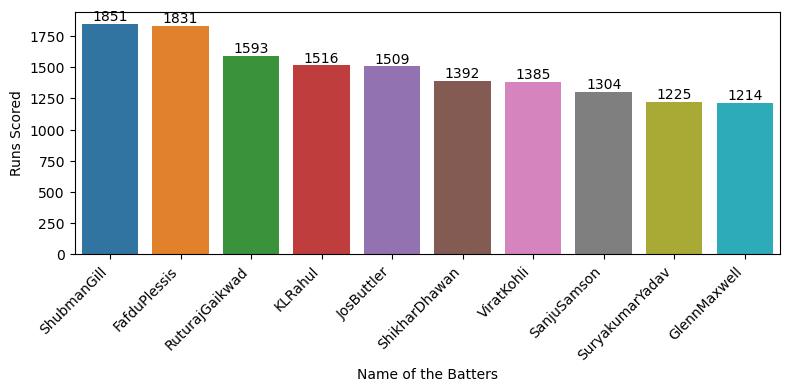

In [14]:
plt.figure(figsize=(8, 4)) 
ax = sns.barplot(data = data1,x='batsmanName',y='runs')
plt.xticks(rotation=45, ha='right', fontsize=10)

# Axes Labelling
plt.xlabel('Name of the Batters')
plt.ylabel('Runs Scored')


# Add data labels
ax.bar_label(ax.containers[0])

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

## 2. Top 10 batsmen based on past 3 years batting average. (Min 60 balls faced in each Season)
 

In [31]:
batting_df.head(3)

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66


In [45]:
match_df.head(3)

,team1,team2,winner,margin,matchDate,match_id,year
0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817,2021
1,Capitals,KKR,KKR,3 wickets,"Oct 13, 2021",T206442,2021
2,RCB,KKR,KKR,4 wickets,"Oct 11, 2021",T208597,2021


In [33]:
# Merge the batting summary with match summary to get match dates

merged_df = pd.merge(batting_df, match_df[['match_id', 'matchDate']], on='match_id', how='left')

In [36]:
merged_df.head(5)

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,matchDate
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,"Oct 15, 2021"
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,"Oct 15, 2021"
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66,"Oct 15, 2021"
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00,"Oct 15, 2021"
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60,"Oct 15, 2021"


In [42]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   match_id     3268 non-null   object
 1   match        3268 non-null   object
 2   teamInnings  3268 non-null   object
 3   battingPos   3268 non-null   int64 
 4   batsmanName  3268 non-null   object
 5   out/not_out  3268 non-null   object
 6   runs         3268 non-null   int64 
 7   balls        3268 non-null   int64 
 8   4s           3268 non-null   int64 
 9   6s           3268 non-null   int64 
 10  SR           3268 non-null   object
 11  matchDate    3268 non-null   object
dtypes: int64(5), object(7)
memory usage: 306.5+ KB


In [48]:
# Convert matchDate to datetime
# used Coerce because it was giving error.

merged_df['matchDate'] = pd.to_datetime(merged_df['matchDate'], errors='coerce')

In [49]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   match_id     3268 non-null   object        
 1   match        3268 non-null   object        
 2   teamInnings  3268 non-null   object        
 3   battingPos   3268 non-null   int64         
 4   batsmanName  3268 non-null   object        
 5   out/not_out  3268 non-null   object        
 6   runs         3268 non-null   int64         
 7   balls        3268 non-null   int64         
 8   4s           3268 non-null   int64         
 9   6s           3268 non-null   int64         
 10  SR           3268 non-null   object        
 11  matchDate    3256 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 306.5+ KB


In [50]:
merged_df.head(3)

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,matchDate
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,2021-10-15
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,2021-10-15
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66,2021-10-15


In [65]:
#We'll filter out the batsmen who have faced less than 60 balls in any season.

balls_faced = merged_df.groupby(['batsmanName','matchDate'])['balls'].sum().reset_index()

# Filter out batsmen with less than 60 balls faced in any season.

eligible_batsmen = balls_faced[balls_faced['balls'] >= 60]['batsmanName'].unique()

filtered_df = merged_df[merged_df['batsmanName'].isin(eligible_batsmen)]  # this variable consists of the name of the batsman who faced atleast 60 balls in each season.



In [112]:
filtered_df

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,matchDate,count_of_out
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,2021-10-15,1
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,2021-10-15,1
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60,2021-10-15,1
16,T206442,Capitals Vs KKR,Capitals,2,ShikharDhawan,out,36,39,1,2,92.30,2021-10-13,1
22,T206442,Capitals Vs KKR,KKR,1,ShubmanGill,out,46,46,1,1,100.00,2021-10-13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,T208512,Super Giants Vs Capitals,Capitals,3,MitchellMarsh,out,0,1,0,0,0.00,2023-04-01,1
3236,T202853,Punjab Kings Vs KKR,Punjab Kings,1,PrabhsimranSingh,out,23,12,2,2,191.66,2023-04-01,1
3237,T202853,Punjab Kings Vs KKR,Punjab Kings,2,ShikharDhawan,out,40,29,6,0,137.93,2023-04-01,1
3253,T201566,Super Kings Vs Titans,Super Kings,2,RuturajGaikwad,out,92,50,4,9,184.00,2023-03-31,1


In [73]:
# NOW WE WILL CALCULATE THE AVERAGE BEFORE FILTERING THE TOP 10 BATSMAN.
#FORMULA FOR AVERAGE IS THE TOTAL RUNS SCORED / TOTAL OUTS

# Create a column to indicate whether the batsman is out or not
filtered_df['count_of_out'] = filtered_df['out/not_out'].apply(lambda x: 1 if x=='out' else 0 )

# Group by batsmanName and calculate total runs and total outs
batsman_stats = filtered_df.groupby('batsmanName').agg( total_runs =('runs','sum'),total_outs = ('count_of_out','sum')
                                      ).reset_index()

# Now we will Calculate the batting average

batsman_stats['average'] = batsman_stats['total_runs'] / batsman_stats['total_outs']


C:\Users\adinr\AppData\Local\Temp\ipykernel_14376\602532642.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['count_of_out'] = filtered_df['out/not_out'].apply(lambda x: 1 if x=='out' else 0 )


In [71]:
filtered_df.groupby('batsmanName').agg( total_runs =('runs','sum'),total_outs = ('count_of_out','sum')
                                      ).reset_index()

,batsmanName,total_runs,total_outs
0,FafduPlessis,1831,42
1,JosButtler,1509,36
2,KLRahul,1516,30
3,MitchellMarsh,379,17
4,PrabhsimranSingh,391,17
5,QuintondeKock,948,28
6,RuturajGaikwad,1593,42
7,SanjuSamson,1304,40
8,ShikharDhawan,1392,35
9,ShubmanGill,1851,46


In [77]:
batsman_stats

,batsmanName,total_runs,total_outs,average
0,FafduPlessis,1831,42,43.595238
1,JosButtler,1509,36,41.916667
2,KLRahul,1516,30,50.533333
3,MitchellMarsh,379,17,22.294118
4,PrabhsimranSingh,391,17,23.000000
5,QuintondeKock,948,28,33.857143
6,RuturajGaikwad,1593,42,37.928571
7,SanjuSamson,1304,40,32.600000
8,ShikharDhawan,1392,35,39.771429
9,ShubmanGill,1851,46,40.239130


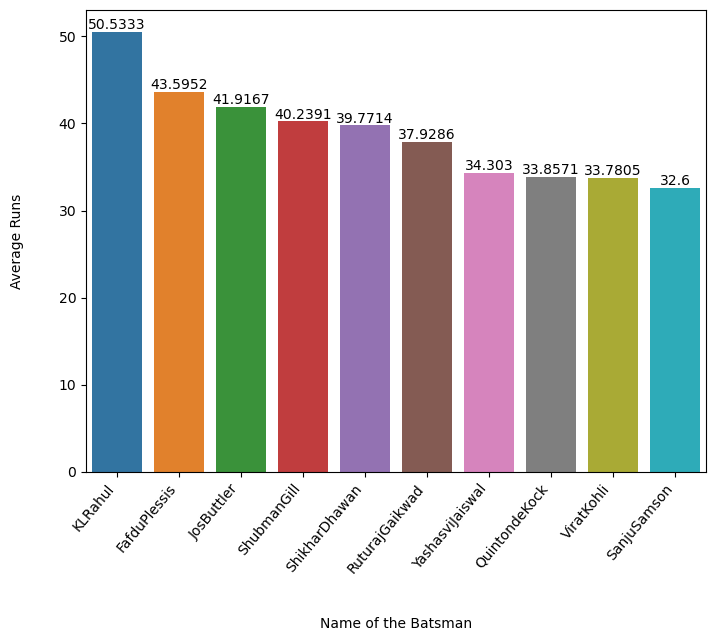

In [113]:
# Now time to Create a Chart a bar chart for the above data.

plt.figure(figsize=(8,6))

ax1 = sns.barplot(data=batsman_stats.sort_values(by='average',ascending=False).head(10),x='batsmanName',y='average')

plt.xlabel('Name of the Batsman',labelpad=30)  # labelpad is used for spacing of the axis lables from the figures.
plt.ylabel('Average Runs',labelpad=25)

plt.xticks(rotation =50,fontsize=10,ha='right')

ax1.bar_label(ax1.containers[0])

plt.show()

## 3. Top 10 batsmen based on past 3 years strike rate (min 60 balls faced in each season )

In [164]:
batting_df.head(3)

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66


In [165]:
match_df.head(3)

,team1,team2,winner,margin,matchDate,match_id
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817
1,Capitals,KKR,KKR,3 wickets,2021-10-13,T206442
2,RCB,KKR,KKR,4 wickets,2021-10-11,T208597


In [167]:
# Convert matchDate to datetime
match_df['matchDate'] = pd.to_datetime(match_df['matchDate'], errors='coerce')

In [168]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   team1      206 non-null    object        
 1   team2      206 non-null    object        
 2   winner     206 non-null    object        
 3   margin     206 non-null    object        
 4   matchDate  205 non-null    datetime64[ns]
 5   match_id   206 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 9.8+ KB


In [174]:
# we will now Merge the two dataframes
sr_merge = pd.merge(batting_df,match_df,on='match_id')

In [175]:
sr_merge.head(2)

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,team1,team2,winner,margin,matchDate
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,Super Kings,KKR,Super Kings,27 runs,2021-10-15
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,Super Kings,KKR,Super Kings,27 runs,2021-10-15


In [195]:
# After conversion of matchDate column , we will now filter out atleast 60 balls faced by each batsman.

balls_faced_sr = sr_merge.groupby(['batsmanName','matchDate'])['balls'].sum().reset_index()

filter_sr = balls_faced_sr.query('balls >= 60')['batsmanName'].unique()

sr_df = sr_merge[sr_merge['batsmanName'].isin(filter_sr)]

#The Dataframe balls_faced_sr consists of the grouped data acc to name and date (year) of each batsman.because we have to filter for each year and each batsman.
# Then the filter_sr dataframe consists of  names of the batsman who faced atleast 60 balls per season.
# Then the final_sr_df first checks that the name is in the merged data and returns true or false, then returns the whole dataframe.

In [196]:
sr_df.head(3)

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,team1,team2,winner,margin,matchDate
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,Super Kings,KKR,Super Kings,27 runs,2021-10-15
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,Super Kings,KKR,Super Kings,27 runs,2021-10-15
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60,Super Kings,KKR,Super Kings,27 runs,2021-10-15


In [198]:
# Now we will calculate the strike rate of each batsman:

final_sr_df = sr_df.groupby('batsmanName').agg( total_runs_sr = ('runs','sum'), total_balls_sr = ('balls','sum')).reset_index()

final_sr_df['strike_rate'] = ( final_sr_df['total_runs_sr'] / final_sr_df['total_balls_sr'] ) * 100 

final_sr_df

,batsmanName,total_runs_sr,total_balls_sr,strike_rate
0,FafduPlessis,1831,1300,140.846154
1,JosButtler,1509,1027,146.932814
2,KLRahul,1516,1148,132.055749
3,MitchellMarsh,379,286,132.517483
4,PrabhsimranSingh,391,272,143.750000
5,QuintondeKock,948,699,135.622318
6,RuturajGaikwad,1593,1157,137.683665
7,SanjuSamson,1304,902,144.567627
8,ShikharDhawan,1392,1081,128.769658
9,ShubmanGill,1851,1331,139.068370


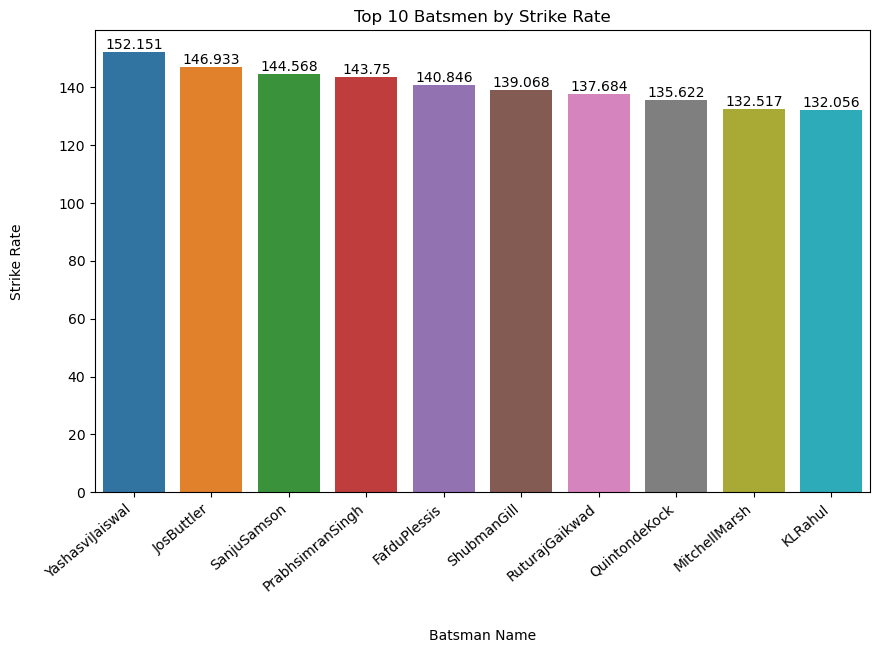

In [232]:
# Here's the visualization of the Above Data

plt.figure(figsize=(10,6))

ax = sns.barplot(data=final_sr_df.sort_values(by='strike_rate',ascending = False).head(10),x='batsmanName',y='strike_rate')


plt.xticks(rotation =40,ha='right')


ax.bar_label(ax.containers[0])


# Add labels and title for better readability
plt.xlabel('Batsman Name',labelpad=25)
plt.ylabel('Strike Rate',labelpad=25)
plt.title('Top 10 Batsmen by Strike Rate')

# Show the plot
plt.show()


## 4. Top 10 bowlers based on past 3 years total wickets taken.

In [37]:
bowling_df.head(3)

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0


In [38]:
bowlers_top10 = bowling_df.groupby('bowlerName')['wickets'].sum().sort_values(ascending = False).reset_index().head(10)
bowlers_top10

,bowlerName,wickets
0,MohammedShami,67
1,YuzvendraChahal,66
2,HarshalPatel,65
3,RashidKhan,63
4,AveshKhan,47
5,KagisoRabada,45
6,ArshdeepSingh,45
7,VarunChakravarthy,44
8,ShardulThakur,43
9,TrentBoult,42


In [39]:
# Here's the visualization of the above data.

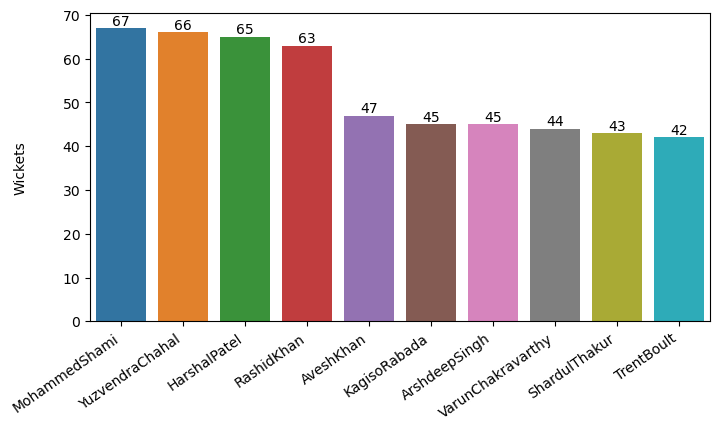

In [40]:
plt.figure(figsize=(8, 4)) 
ax = sns.barplot(data=bowlers_top10,x='bowlerName',y='wickets')

# To rotate the names on the x-axis 
plt.xticks(rotation=35, ha='right', fontsize=10)

# For Giving Data Labels 
ax.bar_label(ax.containers[0])

# Remove the x-axis label
plt.xlabel('')

plt.ylabel('Wickets',labelpad=25) # labelpad is used for spacing of the axis lables from the figures.

plt.show()


##  5. Top 10 bowlers based on past 3 years bowling average. (min 60 balls bowled in each season)

In [235]:
bowling_df.head(3)

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0


In [236]:
bowling_df['overs'].unique()

array([3. , 4. , 1. , 3.5, 1.4, 3.4, 2. , 3.1, 2.2, 2.1, 2.3, 2.4, 0.1,
       3.3, 1.1, 2.5, 3.2, 1.5, 1.3, 0.3, 0.2, 1.2, 0.5])

In [243]:
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2436 entries, 0 to 2435
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   match_id     2436 non-null   object 
 1   match        2436 non-null   object 
 2   bowlingTeam  2436 non-null   object 
 3   bowlerName   2436 non-null   object 
 4   overs        2436 non-null   object 
 5   maiden       2436 non-null   int64  
 6   runs         2436 non-null   int64  
 7   wickets      2436 non-null   int64  
 8   economy      2436 non-null   float64
 9   0s           2436 non-null   int64  
 10  4s           2436 non-null   int64  
 11  6s           2436 non-null   int64  
 12  wides        2436 non-null   int64  
 13  noBalls      2436 non-null   int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 266.6+ KB


In [244]:
def overs_split(x):
    return x.split('.')[-1]

In [ ]:
# explain how 

In [245]:
bowling_df['over2'] = bowling_df['overs'].apply(overs_split)

In [247]:
bowling_df.head(3)

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,over2
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0,0
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0,0
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0,0


In [248]:
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2436 entries, 0 to 2435
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   match_id     2436 non-null   object 
 1   match        2436 non-null   object 
 2   bowlingTeam  2436 non-null   object 
 3   bowlerName   2436 non-null   object 
 4   overs        2436 non-null   object 
 5   maiden       2436 non-null   int64  
 6   runs         2436 non-null   int64  
 7   wickets      2436 non-null   int64  
 8   economy      2436 non-null   float64
 9   0s           2436 non-null   int64  
 10  4s           2436 non-null   int64  
 11  6s           2436 non-null   int64  
 12  wides        2436 non-null   int64  
 13  noBalls      2436 non-null   int64  
 14  over2        2436 non-null   object 
dtypes: float64(1), int64(8), object(6)
memory usage: 285.6+ KB


In [273]:
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2436 entries, 0 to 2435
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   match_id     2436 non-null   object 
 1   match        2436 non-null   object 
 2   bowlingTeam  2436 non-null   object 
 3   bowlerName   2436 non-null   object 
 4   overs        2436 non-null   int32  
 5   maiden       2436 non-null   int64  
 6   runs         2436 non-null   int64  
 7   wickets      2436 non-null   int64  
 8   economy      2436 non-null   float64
 9   0s           2436 non-null   int64  
 10  4s           2436 non-null   int64  
 11  6s           2436 non-null   int64  
 12  wides        2436 non-null   int64  
 13  noBalls      2436 non-null   int64  
 14  over2        2436 non-null   int32  
 15  balls        2436 non-null   int32  
dtypes: float64(1), int32(3), int64(8), object(4)
memory usage: 276.1+ KB


In [261]:
bowling_df['overs'] = bowling_df['overs'].astype(str).str.split('.').str[0].astype(int)

In [267]:
bowling_df['over2'] = bowling_df['over2'].astype(int)

In [295]:
bowling_df.head(3)

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,over2,balls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3,0,33,0,11.0,6,2,3,0,0,0,18
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4,0,32,1,8.0,8,1,2,0,0,0,24
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4,0,56,0,14.0,4,7,2,2,0,0,24


In [269]:
bowling_df['balls'] = ( bowling_df['overs'] * 6 ) + bowling_df['over2']

In [294]:
bowling_df['balls'].unique()

array([18, 24,  6, 23, 10, 22, 12, 19, 14, 13, 15, 16,  1, 21,  7, 17, 20,
       11,  9,  3,  2,  8,  5])

In [304]:
bowling_df.head(3)

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,over2,balls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3,0,33,0,11.0,6,2,3,0,0,0,18
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4,0,32,1,8.0,8,1,2,0,0,0,24
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4,0,56,0,14.0,4,7,2,2,0,0,24


In [313]:
match_df.head(2)

,team1,team2,winner,margin,matchDate,match_id
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817
1,Capitals,KKR,KKR,3 wickets,2021-10-13,T206442


In [278]:
bowler_merge = pd.merge(bowling_df,match_df,on='match_id')

In [280]:
bowler_merge.head(2)

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,...,6s,wides,noBalls,over2,balls,team1,team2,winner,margin,matchDate
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3,0,33,0,11.0,6,...,3,0,0,0,18,Super Kings,KKR,Super Kings,27 runs,2021-10-15
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4,0,32,1,8.0,8,...,2,0,0,0,24,Super Kings,KKR,Super Kings,27 runs,2021-10-15


In [332]:
# Incorrect filtering
bowler_only = bowler_merge.groupby('bowlerName')['balls'].sum().reset_index().sort_values(by='balls',ascending = False)
filter_bowler = bowler_only.query('balls >= 60 ')

filter_bowler_df = bowler_merge[bowler_merge['bowlerName'].isin(filter_bowler['bowlerName'])]


In [335]:
filter_bowler_df.head(1)

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,...,6s,wides,noBalls,over2,balls,team1,team2,winner,margin,matchDate
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3,0,33,0,11.0,6,...,3,0,0,0,18,Super Kings,KKR,Super Kings,27 runs,2021-10-15


In [344]:
# Now lets calculate the Bowling Average

before_average_df = filter_bowler_df.groupby('bowlerName').agg (total_runs_c = ('runs','sum') , total_wickets = ('wickets','sum')).reset_index()

before_average_df['average'] = before_average_df['total_runs_c'] / before_average_df['total_wickets']


before_average_df.head(3)

,bowlerName,total_runs_c,total_wickets,average
0,AbhishekSharma,212,6,35.333333
1,AdamMilne,150,3,50.000000
2,AdamZampa,188,8,23.500000


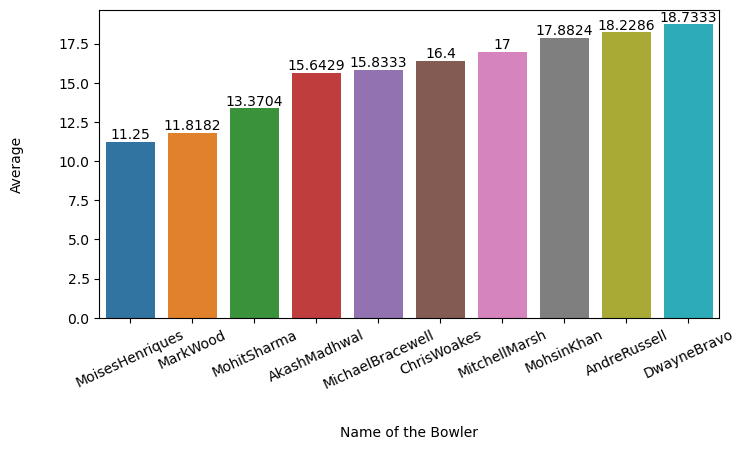

In [359]:
# Here's The Visualization of the Above Data.

plt.figure(figsize=(8,4))
ax = sns.barplot(data=before_average_df.sort_values(by='average').head(10),x='bowlerName',y='average')

plt.xlabel('Name of the Bowler',labelpad=25)
plt.ylabel('Average',labelpad=25)

plt.xticks(rotation = 25,ha='center')

ax.bar_label(ax.containers[0])


plt.show()

## 6. Top 5 batsmen based on past 3 years boundary % (fours and sixes).

In [360]:
batting_df.head(3)

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66


In [365]:
# batting_df.info()

In [392]:
batting_df.head(3)

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66


In [394]:
match_df.head(1)

,team1,team2,winner,margin,matchDate,match_id
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817


In [398]:
sr_merge.head(2)

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,team1,team2,winner,margin,matchDate
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,Super Kings,KKR,Super Kings,27 runs,2021-10-15
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,Super Kings,KKR,Super Kings,27 runs,2021-10-15


In [399]:
sr_merge['boundary_runs'] = ( sr_merge['4s'] * 4 ) + ( sr_merge['6s'] * 6 )

In [407]:
sr_merge.head(2)

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,team1,team2,winner,margin,matchDate,boundary_runs
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,Super Kings,KKR,Super Kings,27 runs,2021-10-15,18
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,Super Kings,KKR,Super Kings,27 runs,2021-10-15,46


In [422]:
sr_merge.drop(columns='boundary_runs',inplace=True)

In [424]:
sr_merge.head(2)

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,team1,team2,winner,margin,matchDate
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,Super Kings,KKR,Super Kings,27 runs,2021-10-15
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,Super Kings,KKR,Super Kings,27 runs,2021-10-15


In [427]:
# Group by batsmanName and calculate total runs and boundary runs
grouped = sr_merge.groupby('batsmanName').agg(
    total_runs=('runs', 'sum'),
    total_fours=('4s', 'sum'),
    total_sixes=('6s', 'sum')
).reset_index()

# Calculate total boundary runs
grouped['total_boundary_runs'] = (grouped['total_fours'] * 4) + (grouped['total_sixes'] * 6)

# Calculate boundary percentage
grouped['boundary%'] = (grouped['total_boundary_runs'] / grouped['total_runs']) * 100

# Sort by boundary percentage in descending order
sorted_grouped = grouped.sort_values(by='boundary%', ascending=False)


In [431]:
final_boundary_df = sorted_grouped.sort_values(by='boundary%',ascending = False)
final_boundary_df.head(10)

,batsmanName,total_runs,total_fours,total_sixes,total_boundary_runs,boundary%
119,LittonDas,4,1,0,4,100.000000
4,AbhijeetTomar,4,1,0,4,100.000000
130,MarkWood,11,1,1,10,90.909091
205,SanvirSingh,11,1,1,10,90.909091
220,ShreyasGopal,16,2,1,14,87.500000
208,SeanAbbott,7,0,1,6,85.714286
49,DavidWiese,21,0,3,18,85.714286
123,MaheeshTheekshana,7,0,1,6,85.714286
13,AkashDeep,17,2,1,14,82.352941
28,AveshKhan,27,1,3,22,81.481481
